In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [2]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()
X = data.data[:,:2]
y = data.target

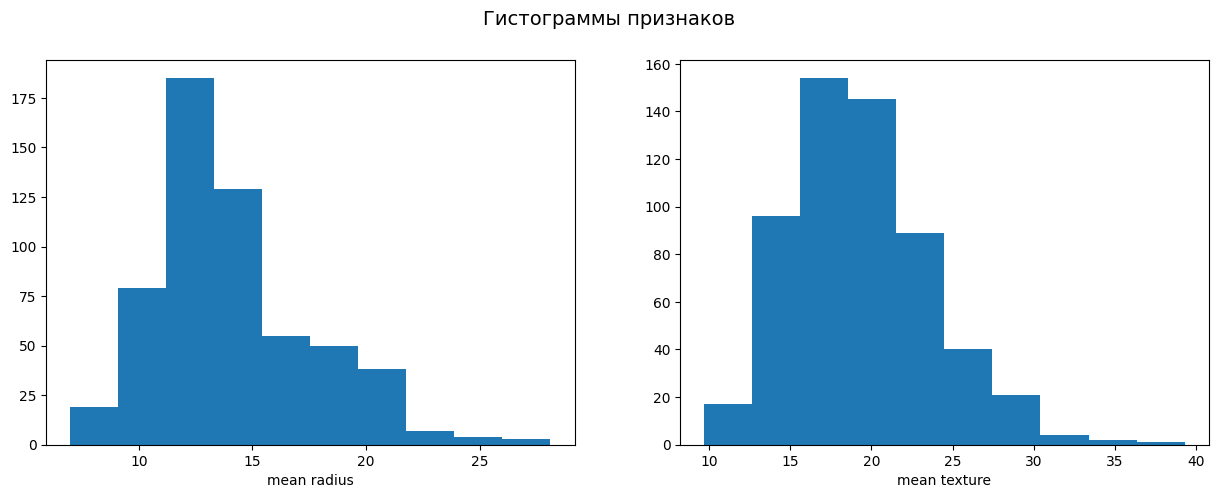

In [3]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [6]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.9127516778523489


[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917468


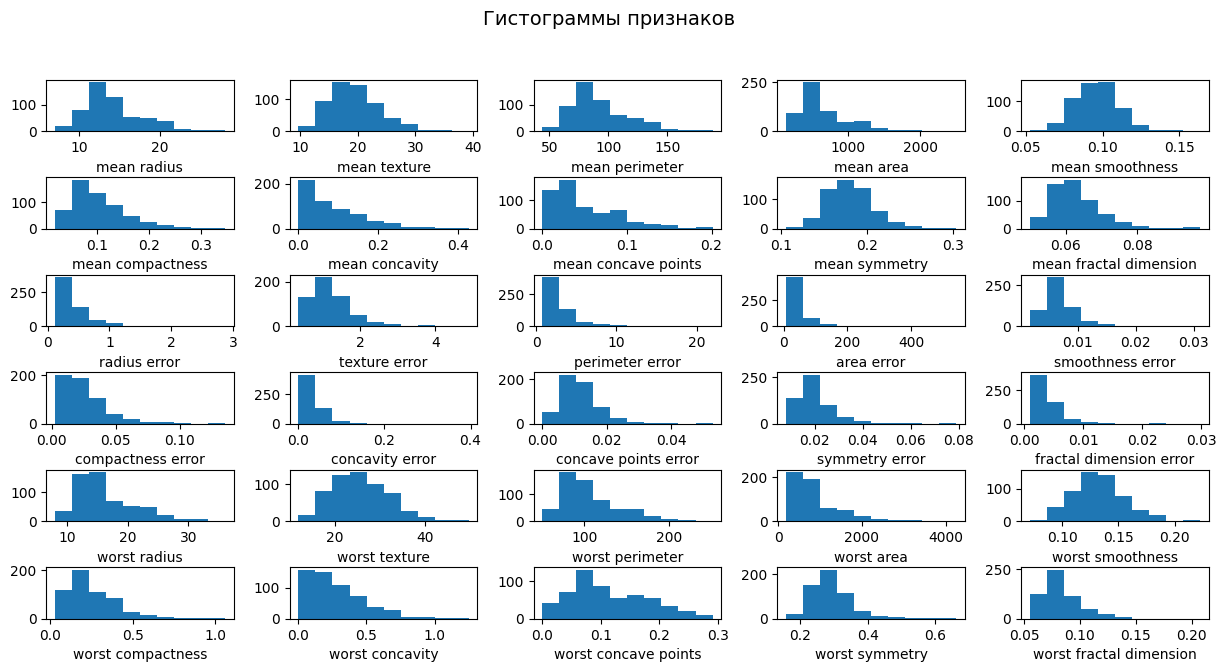

In [9]:
X = data.data
y = data.target
X.shape, y.shape
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])

    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

# 1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [10]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = data.data
y = data.target

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

models = [
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB()),
    ('CategoricalNB', CategoricalNB()),
    ('ComplementNB', ComplementNB())
]
for name, model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'{name}: {accuracy:.4f}')

MultinomialNB: 0.8963
BernoulliNB: 0.6274
CategoricalNB: 0.9596
ComplementNB: 0.8946


2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML3.6%20bayes/titanic.csv')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,1,29.0,1,2,23.4500,0,0,1
889,890,1,1,0,26.0,0,0,30.0000,1,0,0


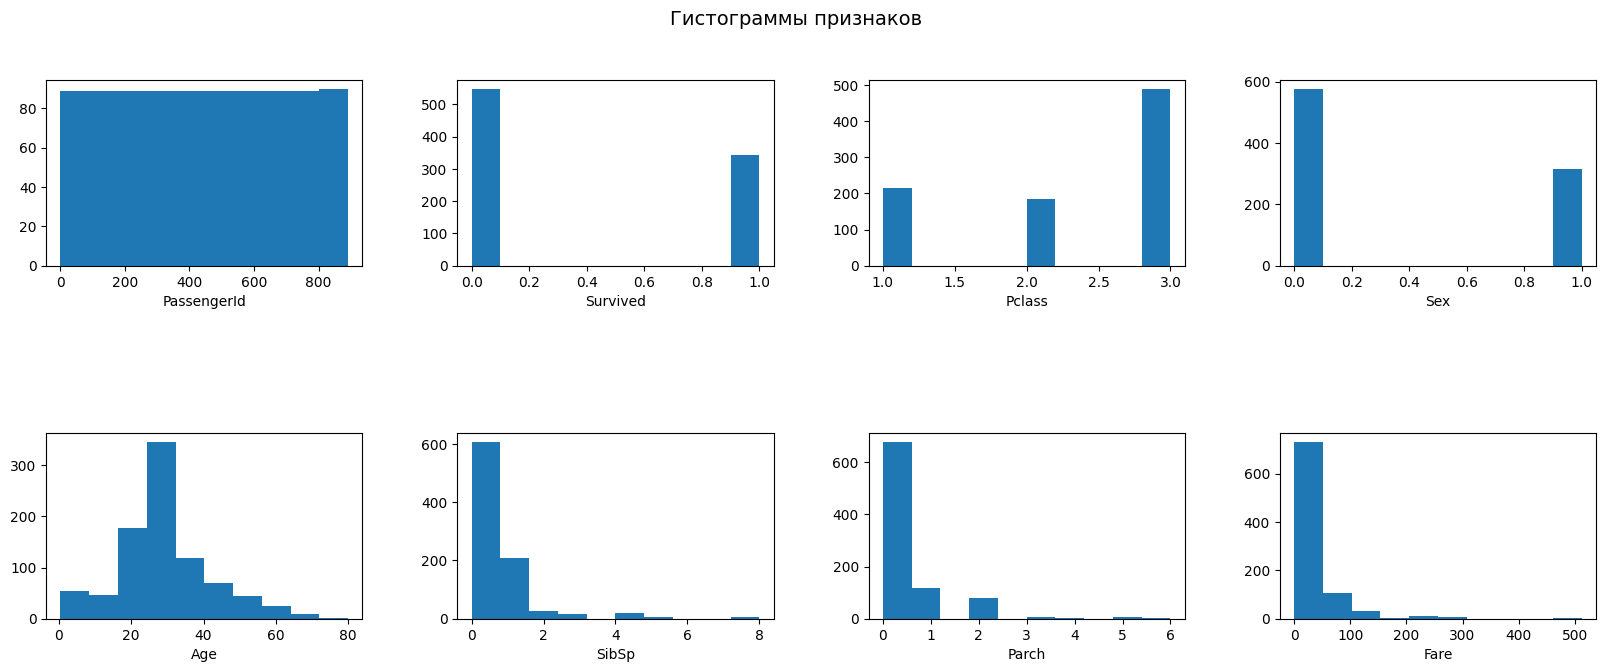

In [12]:
X = df.iloc[:,:7]
y = df.iloc[:,-3:]

f = plt.figure(figsize=(20, 7))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.hist(df.iloc[:, i].values)
    plt.xlabel(df.columns[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [13]:
df = df.drop(['PassengerId',	'Survived',	'Pclass',	'Sex'], axis=1)
y = y.values
x = df.iloc[:,:4].values

y_target = np.dot(y , np.array([3, 2, 1]))

models = [
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB()),
    ('CategoricalNB', CategoricalNB()),
    ('ComplementNB', ComplementNB())
]

for name, model in models:
    model.fit(x, y_target)
    y_pred = model.predict(x)
    accuracy = accuracy_score(y_target, y_pred)
    print(f'{name}: {accuracy:.4f}')


MultinomialNB: 0.3749
BernoulliNB: 0.7250
CategoricalNB: 0.7834
ComplementNB: 0.6251


# 3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [18]:
import pandas as pd

df = pd.read_csv('test_data.csv')
df

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,886,887,0,1,0.3375,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
96,887,888,1,0,0.2375,0.058556,1,0,0,0.0,0,0,0,1,0,0,1
97,888,889,0,0,0.3500,0.045771,0,0,1,0.3,0,0,0,1,0,0,1
98,889,890,1,1,0.3250,0.058556,1,0,0,0.0,1,0,0,0,1,0,0


In [27]:
data = df.drop(['PassengerId', 'Sex'], axis=1).dropna()
data

,Unnamed: 0,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,0,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,0,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,0,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,0,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,886,0,0.3375,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
96,887,1,0.2375,0.058556,1,0,0,0.0,0,0,0,1,0,0,1
97,888,0,0.3500,0.045771,0,0,1,0.3,0,0,0,1,0,0,1
98,889,1,0.3250,0.058556,1,0,0,0.0,1,0,0,0,1,0,0


In [29]:
X = data.iloc[:, 1:]
y = data.iloc[:, 1].values
gnb = GaussianNB().fit(X, y)

y_pred = gnb.predict(X)
accuracy = accuracy_score(y, y_pred)

print(f'accuracy : {accuracy:.4f}')

accuracy : 1.0000
